# Deploy DL Model on Web & Mobile Using Pyotrch
---
## Milestone 1: Build an image classifier
## Partial Solutions Notebook
---
#### Date updated:  12-September-2021
#### Author:  Nidhin Pattaniyil & Reshama Shaikh


In [1]:
%matplotlib inline

In [2]:
!ls

00_dataset.ipynb
01_train_out.txt
01_training-quant.ipynb
01_training.ipynb
01_training_raw_food.ipynb
02_evaluation.ipynb
03_torch_optimization.ipynb
Untitled.ipynb
Untitled1.ipynb
__pycache__
ant_transfer_learning_tutorial.ipynb
artifacts
asdad
conversion.ipynb
data
lightning_logs
milestone1_partial_solution_3classes.ipynb
requirements.txt
test2.py
train.py
utility.py
wandb


## Imports

In [3]:
# from datetime import date
# from datetime import datetime
import datetime
import plotly.figure_factory as ff
import wandb
from matplotlib import pyplot as plt
import sklearn
import pytorch_lightning as pl
import flash
import flash.image
from flash.core.data.utils import download_data
# from flash.image import ImageClassificationData, ImageClassifier
import os
import glob
import pandas as pd
import sklearn.model_selection
#from sklearn.model_selection import train_test_split 
#from flash.image.classification.adapters import TRAINING_STRATEGIES
# from flash.image.classification.backbones import IMAGE_CLASSIFIER_BACKBONES
# from flash.core.classification import Probabilities
import numpy as np
import torch
from torchvision import transforms as T
import flash
from flash.core.data.data_source import DefaultDataKeys
from flash.core.data.transforms import ApplyToKeys, merge_transforms
# from flash.image import ImageClassificationData, ImageClassifier
# from flash.image.classification.transforms import default_transforms
import flash.core.integrations.fiftyone
import flash.core.classification 
import fiftyone as fo
import warnings
import itertools
import timeit
import json
import torchinfo
import utility
import joblib
import torchvision
import flash
import flash.image
import torch

In [4]:
pl.seed_everything(99)

Global seed set to 99


99

In [5]:
flash.__version__

'0.5.2'

## Parameters


In [6]:
model_name = 'resnet34'

## Helper code

In [7]:
# def create_fiftyone_dataset(df:pd.DataFrame, name="test_df"):
#     samples = []
    
#     if fo.dataset_exists(name):
#         fo.delete_dataset(name)
#     for record in df.to_dict(orient='records'):
#         sample = fo.Sample(
#                 filepath=record['file_path'],
#                 ground_truth=fo.Classification(label=record['label']),
#             )
        
#         sample['ground_truth'] = fo.Classification(label=record['label'])
#         samples.append(sample)
#     dataset = fo.Dataset(name)
#     dataset.add_samples(samples)
#     return dataset

In [8]:
!ls

00_dataset.ipynb
01_train_out.txt
01_training-quant.ipynb
01_training.ipynb
01_training_raw_food.ipynb
02_evaluation.ipynb
03_torch_optimization.ipynb
Untitled.ipynb
Untitled1.ipynb
__pycache__
ant_transfer_learning_tutorial.ipynb
artifacts
asdad
conversion.ipynb
data
lightning_logs
milestone1_partial_solution_3classes.ipynb
requirements.txt
test2.py
train.py
utility.py
wandb


In [9]:


current_date = datetime.date.today()
print("Today's date:", current_date)

Today's date: 2021-11-11


In [10]:
now1 = datetime.datetime.now()

start_time = now1.strftime("%H:%M:%S")
print("Start Time =", start_time)

Start Time = 10:17:21


In [11]:
#!pip install lightning-flash==0.5.0

In [12]:
# get the backbones available for ImageClassifier
backbones = flash.image.ImageClassifier.available_backbones()

# print the backbones
#print(backbones)

In [13]:
backbones

['adv_inception_v3',
 'bat_resnext26ts',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'cspdarknet53',
 'cspdarknet53_iabn',
 'cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'cspresnext50',
 'cspresnext50_iabn',
 'darknet53',
 'deit_base_distilled_patch16_224',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_224',
 'deit_base_patch16_384',
 'deit_small_distilled_patch16_224',
 'deit_small_patch16_224',
 'deit_tiny_distilled_patch16_224',
 'deit_tiny_patch16_224',
 'densenet121',
 'densenet121d',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenet264',
 'densenet264d_iabn',
 'densenetblur121d',
 'dino_deits16',
 'dino_deits8',
 'dino_vitb16',
 'dino_vitb8',
 'dla102',
 

In [14]:
warnings.filterwarnings("ignore", message="Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.")

In [15]:

# https://lp-prod-resources.s3-us-west-2.amazonaws.com/other/Deploying+a+Deep+Learning+Model+on+Web+and+Mobile+Applications+Using+TensorFlow/Food+101+-+Data+Subset.zip

In [16]:
#download_data("https://pl-flash-data.s3.amazonaws.com/hymenoptera_data.zip", 'data/')


## Prepare dataset

In [17]:
datamodule , df_eval = utility.prepare_dataset("artifacts/data")

/opt/conda/envs/pt/lib/python3.8/site-packages/flash/core/data/data_source.py:575: UserWarning: Using default resolver, this may take a while.
  warnings.warn("Using default resolver, this may take a while.", UserWarning)
Resolving files: 100%|██████████| 51509/51509 [01:12<00:00, 712.94it/s]
/opt/conda/envs/pt/lib/python3.8/site-packages/flash/core/data/data_source.py:575: UserWarning: Using default resolver, this may take a while.
  warnings.warn("Using default resolver, this may take a while.", UserWarning)
Resolving files: 100%|██████████| 12878/12878 [00:17<00:00, 739.52it/s]
/opt/conda/envs/pt/lib/python3.8/site-packages/flash/core/data/data_source.py:575: UserWarning: Using default resolver, this may take a while.
  warnings.warn("Using default resolver, this may take a while.", UserWarning)
Resolving files: 100%|██████████| 11363/11363 [00:15<00:00, 718.99it/s]


## Model

In [18]:
model_metrics = {}

In [19]:
sample_image = "data/food-101-subset/images/apple_pie/1005649.jpg"
strategy="dp"


In [20]:
label_encoder = joblib.load(f'artifacts/label_encoder.joblib')

In [21]:
sample_input_size = (1, 3, 224, 224)


In [22]:
#?flash.image.ImageClassifier

In [23]:
model_quant = torchvision.models.quantization.mobilenet.mobilenet_v2(pretrained=True)    


In [24]:
strategy ="dp"

In [25]:
def train_model(model_name:str
                ,artifact_model_path:str
                , trainer
                ,epochs = 2, unfreeze_epoch = 5 
                ,num_iterations=10, df_eval=df_eval 
               
               
               ):
    model = flash.image.ImageClassifier(num_classes=datamodule.num_classes,backbone=model_name)
    print (f"Model Spec: {model_name}")
    print(model)
    
    
    
    print ("Model Summary")
    
    model_summary = torchinfo.summary(model, input_size=sample_input_size, verbose=0)
    print (model_summary)
    
    
    
            
    
#     trainer = flash.Trainer(max_epochs=epochs, gpus=torch.cuda.device_count() , strategy=strategy)

    
    
    trainer.finetune(model, datamodule=datamodule
                 , strategy=flash.core.finetuning.FreezeUnfreeze(unfreeze_epoch=unfreeze_epoch) )
    
    
    metrics_test = trainer.test(model, datamodule=datamodule)
    print (metrics_test)

    
    metrics_val =trainer.validate(model, datamodule=datamodule)
    print(metrics_val)
    


    
    

    return model
    
    

In [26]:
max_epochs = 4
unfreeze_epoch = 2

In [27]:
trainer = flash.Trainer(max_epochs=max_epochs, gpus=torch.cuda.device_count() )

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [28]:
@flash.image.ImageClassifier.backbones(name="mobilenet_v2_quant")
def fn_mobilenet_v2_quant(pretrained: bool = True):
    model = torchvision.models.quantization.mobilenet.mobilenet_v2(pretrained=True)    

    # remove the last two layers & turn it into a Sequential model
    # backbone = torch.nn.Sequential(*list(model.children())[:-2])
    
    backbone = model.features
    num_features = model.classifier[-1].in_features
    # backbones need to return the num_features to build the head
    return backbone, num_features

In [29]:
model_name="mobilenet_v2_quant"
artifact_model_path = f"artifacts/model/model_{model_name}.pt"

In [30]:
train_model(model_name=model_name, epochs = max_epochs
            , trainer=trainer
            , unfreeze_epoch = unfreeze_epoch
            , artifact_model_path=artifact_model_path
           )


Model Spec: mobilenet_v2_quant
ImageClassifier(
  (train_metrics): ModuleDict(
    (accuracy): Accuracy()
  )
  (val_metrics): ModuleDict(
    (accuracy): Accuracy()
  )
  (test_metrics): ModuleDict(
    (accuracy): Accuracy()
  )
  (adapter): DefaultAdapter(
    (backbone): Sequential(
      (0): ConvNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (1): QuantizableInvertedResidual(
        (conv): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=

/opt/conda/envs/pt/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:90: LightningDeprecationWarning: Method `on_train_dataloader` is deprecated in v1.5.0 and will be removed in v1.7.0. Please use `train_dataloader()` directly.
  rank_zero_deprecation(
/opt/conda/envs/pt/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:125: LightningDeprecationWarning: Method `on_val_dataloader` is deprecated in v1.5.0 and will be removed in v1.7.0. Please use `val_dataloader()` directly.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type           | Params
-------------------------------------------------
0 | train_metrics | ModuleDict     | 0     
1 | val_metrics   | ModuleDict     | 0     
2 | test_metrics  | ModuleDict     | 0     
3 | adapter       | DefaultAdapter | 2.4 M 
-------------------------------------------------
163 K     Trainable params
2.2 M     Non-trainable params
2.4 M     Tota

Layer (type:depth-idx)                             Output Shape              Param #
ImageClassifier                                    --                        --
├─DefaultAdapter: 1                                --                        --
│    └─Sequential: 2-1                             [1, 1280, 7, 7]           --
│    │    └─ConvNormActivation: 3-1                [1, 32, 112, 112]         928
│    │    └─QuantizableInvertedResidual: 3-2       [1, 16, 112, 112]         896
│    │    └─QuantizableInvertedResidual: 3-3       [1, 24, 56, 56]           5,136
│    │    └─QuantizableInvertedResidual: 3-4       [1, 24, 56, 56]           8,832
│    │    └─QuantizableInvertedResidual: 3-5       [1, 32, 28, 28]           10,000
│    │    └─QuantizableInvertedResidual: 3-6       [1, 32, 28, 28]           14,848
│    │    └─QuantizableInvertedResidual: 3-7       [1, 32, 28, 28]           14,848
│    │    └─QuantizableInvertedResidual: 3-8       [1, 64, 14, 14]           21,056
│    │    └

Validation sanity check: 0it [00:00, ?it/s]

/opt/conda/envs/pt/lib/python3.8/site-packages/pytorch_lightning/utilities/data.py:56: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 64. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
Global seed set to 99


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/opt/conda/envs/pt/lib/python3.8/site-packages/pytorch_lightning/utilities/data.py:56: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 14. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(


Validating: 0it [00:00, ?it/s]

/opt/conda/envs/pt/lib/python3.8/site-packages/pytorch_lightning/callbacks/finetuning.py:207: UserWarning: The provided params to be frozen already exist within another group of this optimizer. Those parameters will be skipped.
HINT: Did you init your optimizer in `configure_optimizer` as such:
 <class 'torch.optim.adam.Adam'>(filter(lambda p: p.requires_grad, self.parameters()), ...) 
  rank_zero_warn(


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/opt/conda/envs/pt/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:173: LightningDeprecationWarning: Method `on_test_dataloader` is deprecated in v1.5.0 and will be removed in v1.7.0. Please use `test_dataloader()` directly.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

/opt/conda/envs/pt/lib/python3.8/site-packages/pytorch_lightning/utilities/data.py:56: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 35. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
/opt/conda/envs/pt/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:173: LightningDeprecationWarning: Method `on_val_dataloader` is deprecated in v1.5.0 and will be removed in v1.7.0. Please use `val_dataloader()` directly.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6400598287582397, 'test_cross_entropy': 1.363258957862854}
--------------------------------------------------------------------------------
[{'test_accuracy': 0.6400598287582397, 'test_cross_entropy': 1.363258957862854}]


Validating: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_accuracy': 0.6553812623023987, 'val_cross_entropy': 1.3508639335632324}
--------------------------------------------------------------------------------
[{'val_accuracy': 0.6553812623023987, 'val_cross_entropy': 1.3508639335632324}]


ImageClassifier(
  (train_metrics): ModuleDict(
    (accuracy): Accuracy()
  )
  (val_metrics): ModuleDict(
    (accuracy): Accuracy()
  )
  (test_metrics): ModuleDict(
    (accuracy): Accuracy()
  )
  (adapter): DefaultAdapter(
    (backbone): Sequential(
      (0): ConvNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (1): QuantizableInvertedResidual(
        (conv): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running

In [31]:
trainer.save_checkpoint(artifact_model_path)


In [32]:

model = flash.image.ImageClassifier.load_from_checkpoint(artifact_model_path)

In [33]:
!ls

00_dataset.ipynb
01_train_out.txt
01_training-quant.ipynb
01_training.ipynb
01_training_raw_food.ipynb
02_evaluation.ipynb
03_torch_optimization.ipynb
Untitled.ipynb
Untitled1.ipynb
__pycache__
ant_transfer_learning_tutorial.ipynb
artifacts
asdad
conversion.ipynb
data
lightning_logs
milestone1_partial_solution_3classes.ipynb
requirements.txt
test2.py
train.py
utility.py
wandb


## Predict on Single

In [34]:
model.serializer = flash.core.classification.Probabilities()

In [35]:
predictions = model.predict("data/food-101-subset/images/apple_pie/2546216.jpg")
predictions
#label_encoder.inverse_transform(predictions)

[[0.7574833631515503,
  0.0010913112200796604,
  0.045642852783203125,
  1.4466212405750412e-07,
  4.724077371065505e-06,
  3.48092034982983e-05,
  0.00039520906284451485,
  6.592661634385877e-07,
  0.13171903789043427,
  0.00047616538358852267,
  9.421193681191653e-06,
  1.2858065019827336e-05,
  0.00012965915084350854,
  4.2221972762490623e-07,
  0.0011873443145304918,
  2.315769779670518e-05,
  5.3359173762146384e-05,
  4.580526001518592e-05,
  0.0003639888600446284,
  2.2278600226854905e-06,
  0.008693384937942028,
  0.00042091176146641374,
  0.00019984909158665687,
  0.0019773365929722786,
  1.5901766801107442e-06,
  2.3611323740624357e-06,
  2.823471550073009e-05,
  1.969488585018553e-05,
  1.3070318345853593e-05,
  1.0236776688543614e-05,
  3.854923988910741e-07,
  1.7054195268428884e-05,
  1.4770241250516847e-05,
  2.7225740950598265e-07,
  0.0006890228833071887,
  2.914124706876464e-06,
  3.9413046692970966e-07,
  8.801808689895552e-06,
  0.0068260058760643005,
  0.00040967517

In [36]:
sorted ( zip (label_encoder.classes_, predictions[0]), key= lambda x:x[1] ,reverse =True)

[('apple_pie', 0.7574833631515503),
 ('bread_pudding', 0.13171903789043427),
 ('baklava', 0.045642852783203125),
 ('fried_calamari', 0.01684378646314144),
 ('chicken_wings', 0.008693384937942028),
 ('samosa', 0.007253990508615971),
 ('fish_and_chips', 0.0068260058760643005),
 ('paella', 0.005716652609407902),
 ('peking_duck', 0.00229276972822845),
 ('grilled_salmon', 0.002019288018345833),
 ('churros', 0.0019773365929722786),
 ('french_toast', 0.0012271194718778133),
 ('carrot_cake', 0.0011873443145304918),
 ('baby_back_ribs', 0.0010913112200796604),
 ('onion_rings', 0.0008753112051635981),
 ('pulled_pork_sandwich', 0.0007693887455388904),
 ('eggs_benedict', 0.0006890228833071887),
 ('shrimp_and_grits', 0.0006773101631551981),
 ('waffles', 0.0004958214121870697),
 ('breakfast_burrito', 0.00047616538358852267),
 ('chocolate_cake', 0.00042091176146641374),
 ('foie_gras', 0.00040967517998069525),
 ('beignets', 0.00039520906284451485),
 ('chicken_curry', 0.0003639888600446284),
 ('panna_co

In [37]:
# datamodule_predict = ImageClassificationData.from_data_frame(
#     "file_path",
#     "label",
#     test_data_frame=df_test,
#     predict_transform=default_transforms
# )
# datamodule_predict

## Predict on dataset

In [38]:
datamodule_predict = flash.image.ImageClassificationData.from_data_frame(
    "file_path",
    "label",
    predict_data_frame=df_eval
)
datamodule_predict

/opt/conda/envs/pt/lib/python3.8/site-packages/flash/core/data/data_source.py:575: UserWarning: Using default resolver, this may take a while.
  warnings.warn("Using default resolver, this may take a while.", UserWarning)
Resolving files: 100%|██████████| 25250/25250 [00:34<00:00, 735.41it/s]


In [39]:
model.serializer = flash.core.classification.Probabilities()

predictions = trainer.predict(model,datamodule=datamodule_predict)
predictions = list(itertools.chain.from_iterable(predictions))  # flatten batches


/opt/conda/envs/pt/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:173: LightningDeprecationWarning: Method `on_predict_dataloader` is deprecated in v1.5.0 and will be removed in v1.7.0. Please use `predict_dataloader()` directly.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/envs/pt/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:110: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 804it [00:00, ?it/s]

In [40]:
y_proba = predictions
y_pred = np.argmax(y_proba, axis=1)
y_true = list(df_eval['label'] )
    

In [41]:
eval_accuracy = sklearn.metrics.accuracy_score(y_true, y_pred)
eval_accuracy

0.7069702970297029

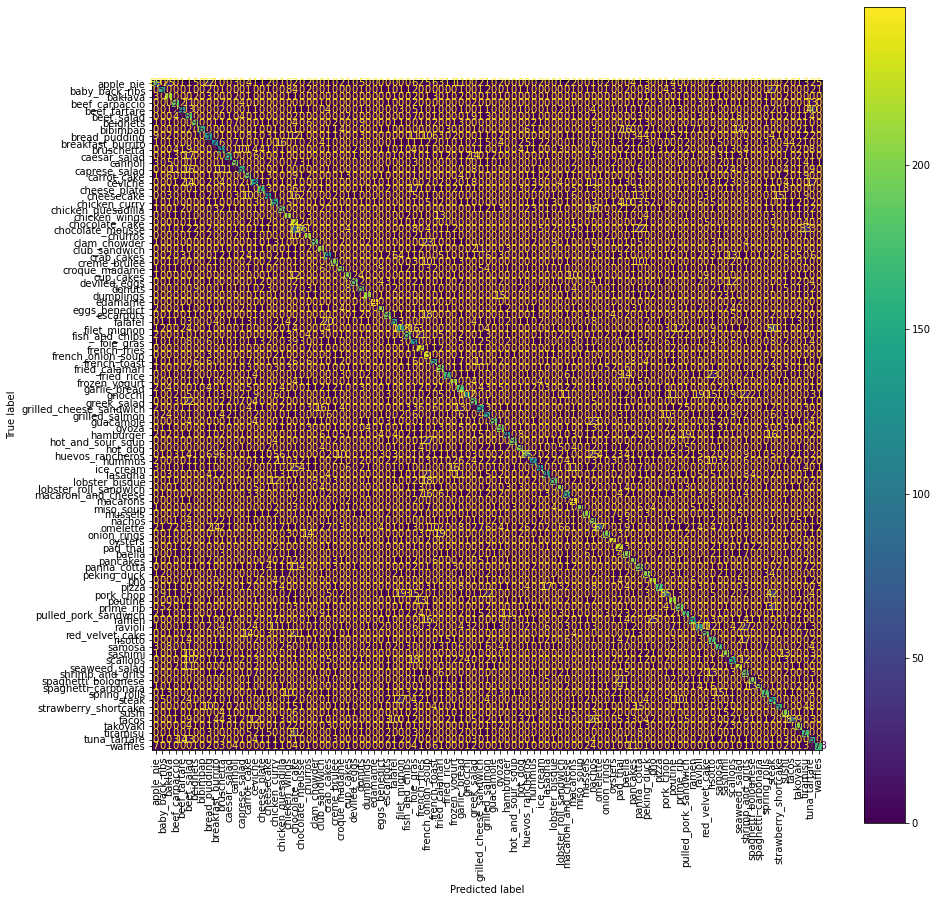

In [42]:
# https://stackoverflow.com/questions/60860121/plotly-how-to-make-an-annotated-confusion-matrix-using-a-heatmap
fig, ax = plt.subplots(figsize=(15,15))
cm_labels = label_encoder.classes_
disp = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(
    y_true=y_true, y_pred = y_pred ,
    #normalize = 'true',
    display_labels=cm_labels,
    xticks_rotation='vertical',
    ax=ax
)
disp